In [1]:
import numpy as np
import os
from collections import defaultdict
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
frame = pd.DataFrame(columns=["points","rate","typ","ms"])

frame_compress = pd.DataFrame(columns=["points","rate","typ","ms"])


for file in os.listdir("performance"):
    if not file.startswith("performance"):
        continue
    with open("performance/" + file, "r") as f:
        _ = f.readline()
        point, rate = file.split('_')[1:3]
        for line in f.readlines():
            if line.startswith("compress"):
                comp_time = float(line.split(" ")[2])
                frame_compress = pd.concat(
                    [frame_compress
                    ,pd.DataFrame(data=[
                        {'points':int(point),
                         'rate':rate,
                         'typ':'compression',
                         'ms':float(line.split(" ")[2])}])],
                    ignore_index=True)                       
                continue
            if line.startswith("transfer_compress"):
                comp_time += float(line.split(" ")[2])                
                frame_compress = pd.concat(
                    [frame_compress
                    ,pd.DataFrame(data=[
                        {'points':int(point),
                         'rate':rate,
                         'typ':'compressed transfer',
                         'ms':float(line.split(" ")[2])}])],
                    ignore_index=True) 
                continue
            if line.startswith("decompress"):
                frame = pd.concat([frame,pd.DataFrame(data=[{'points':int(point),'rate':rate,'typ':'without decompression','ms':comp_time}])],ignore_index=True)                       
                comp_time += float(line.split(" ")[2])
                frame_compress = pd.concat(
                    [frame_compress
                    ,pd.DataFrame(data=[
                        {'points':int(point),
                         'rate':rate,
                         'typ':'decompression',
                         'ms':float(line.split(" ")[2])}])],
                    ignore_index=True) 
                typ = 'compressed'
            if line.startswith("transfer_uncompress"):
                typ = 'no compression'
                comp_time = float(line.split(" ")[2])
            frame = pd.concat([frame,pd.DataFrame(data=[{'points':int(point),'rate':rate,'typ':typ,'ms':comp_time}])],ignore_index=True)                       

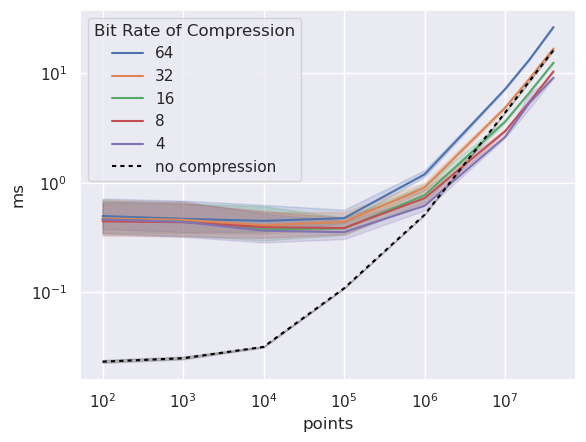

In [3]:
frame_copy = frame
frame = frame.loc[frame["typ"] != 'without decompression']

uncomp = frame.loc[frame["typ"] == 'no compression']   
cmp = frame.loc[frame["typ"] != 'no compression']   
sns.lineplot(x="points", y="ms", hue='rate', data = cmp, hue_order=['64','32','16','8','4'])
g = sns.lineplot(x="points", y="ms", hue='typ', data=uncomp, palette=['black'],dashes=(2,2))
leg = g.axes.get_legend()
leg.set_title("Bit Rate of Compression")
plt.xscale('log')
plt.yscale('log')

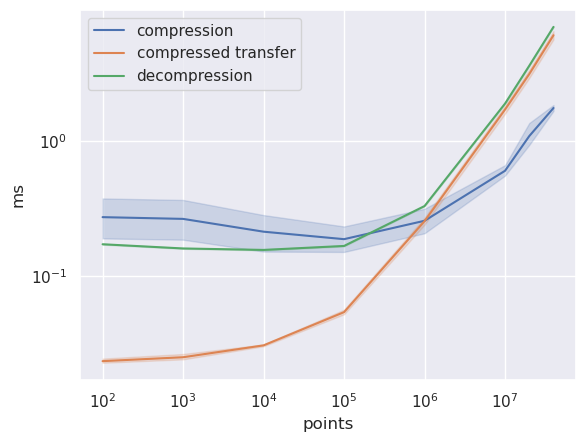

In [4]:
g = sns.lineplot(x="points", y="ms", hue='typ', data = frame_compress)

leg = g.axes.get_legend()
leg.set_title("")
plt.xscale('log')
plt.yscale('log')

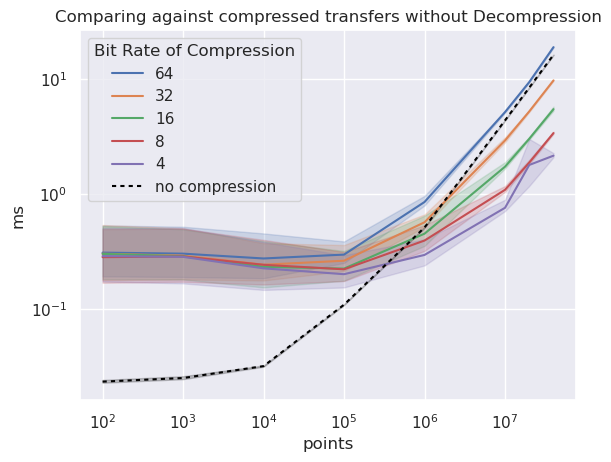

In [5]:
frame = frame_copy
uncomp = frame.loc[frame["typ"] == 'no compression']   
cmp = frame.loc[frame["typ"] == 'without decompression']   
sns.lineplot(x="points", y="ms", hue='rate', data = cmp, hue_order=['64','32','16','8','4'])
g = sns.lineplot(x="points", y="ms", hue='typ', data=uncomp, palette=['black'],dashes=(2,2))
leg = g.axes.get_legend()
leg.set_title("Bit Rate of Compression")
plt.title("Comparing against compressed transfers without Decompression")
plt.xscale('log')
plt.yscale('log')